In [1]:
from pathlib import Path

if Path.cwd().name != "KeypointMatchingTest":
    !git clone --quiet https://github.com/toyat522/KeypointMatchingTest
    %cd KeypointMatchingTest

!pip install --progress-bar off --quiet kornia

/content/KeypointMatchingTest


# LightGlue Demo

Downloading: "https://github.com/cvg/LightGlue/releases/download/v0.1_arxiv/superpoint_v1.pth" to /root/.cache/torch/hub/checkpoints/superpoint_v1.pth
100%|██████████| 4.96M/4.96M [00:00<00:00, 284MB/s]
Downloading: "https://github.com/cvg/LightGlue/releases/download/v0.1_arxiv/superpoint_lightglue.pth" to /root/.cache/torch/hub/checkpoints/superpoint_lightglue_v0-1_arxiv.pth
100%|██████████| 45.3M/45.3M [00:01<00:00, 29.7MB/s]


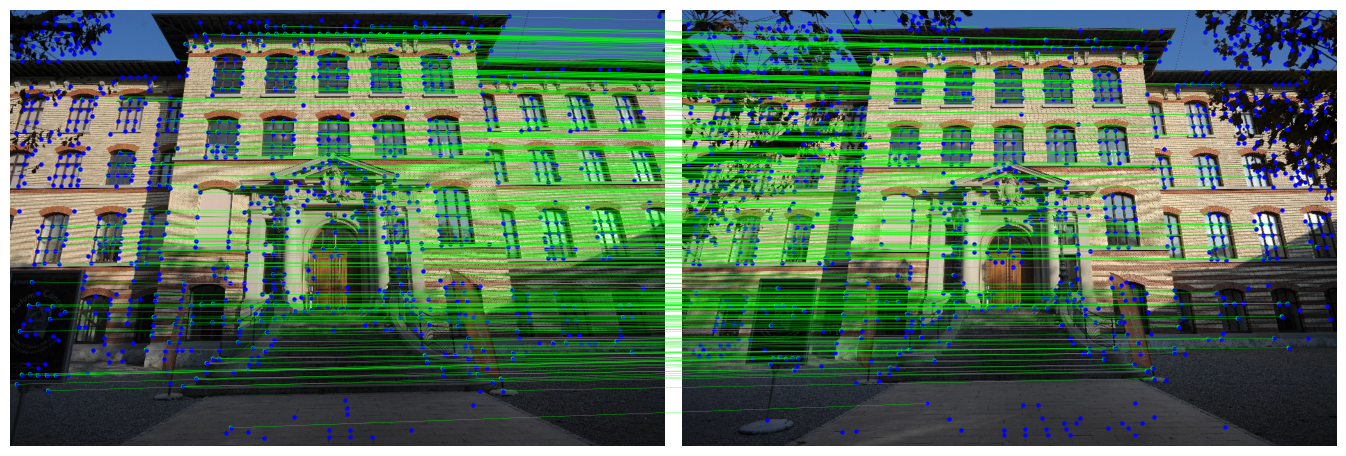

In [2]:
from keypoint_matching.common.keypoint_matcher import KeypointMatcher
from keypoint_matching.lightglue.lightglue_matcher import LightGlueMatcher

print_models = False

kpt_matcher = KeypointMatcher()
kpt_matcher.set_matcher(LightGlueMatcher(max_num_keypoints=1024))

if print_models:
    print("LightGlue model:")
    print(kpt_matcher.get_matcher_model())
    print()

    print("SuperPoint model:")
    print(kpt_matcher.get_descriptor_model())
    print()

img0 = kpt_matcher.load_image("./assets/image0.jpg")
img1 = kpt_matcher.load_image("./assets/image1.jpg")

kpts0, kpts1, m_kpts0, m_kpts1 = kpt_matcher.execute(img0, img1)

kpt_matcher.plot(img0, img1, m_kpts0, m_kpts1, kpts0, kpts1)

# SuperGlue Demo

Downloading: "https://github.com/magicleap/SuperGluePretrainedNetwork/raw/refs/heads/master/models/weights/superglue_outdoor.pth" to /root/.cache/torch/hub/checkpoints/superglue_outdoor.pth
100%|██████████| 46.0M/46.0M [00:00<00:00, 447MB/s]


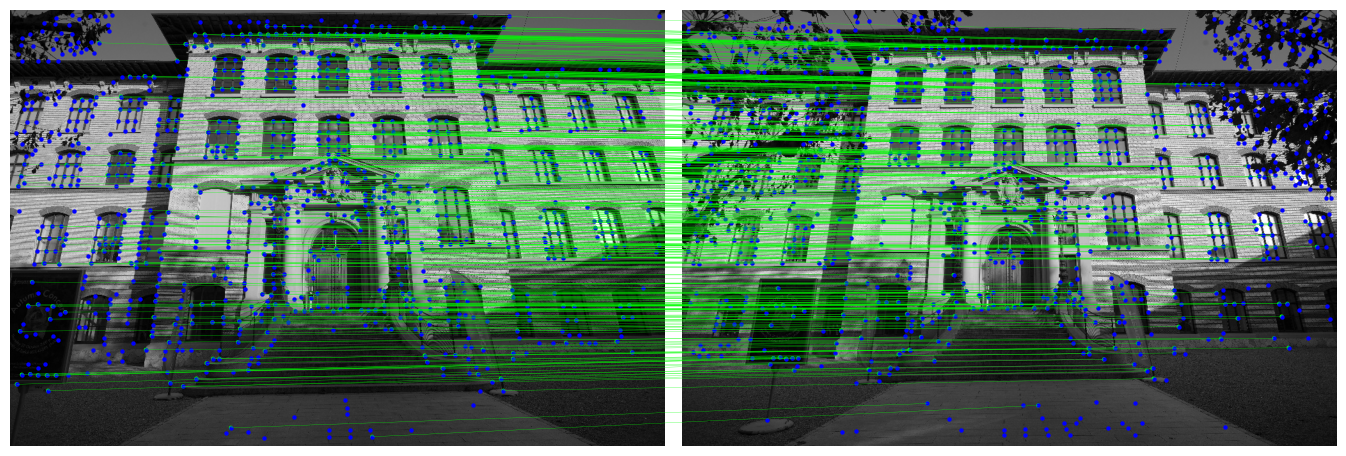

In [3]:
from keypoint_matching.superglue.superglue_matcher import SuperGlueMatcher

print_models = False

kpt_matcher.set_matcher(SuperGlueMatcher(max_num_keypoints=1024))

if print_models:
    print("SuperGlue model:")
    print(kpt_matcher.get_matcher_model())
    print()

    print("SuperPoint model:")
    print(kpt_matcher.get_descriptor_model())
    print()

img0 = kpt_matcher.load_image("./assets/image0.jpg")
img1 = kpt_matcher.load_image("./assets/image1.jpg")

kpts0, kpts1, m_kpts0, m_kpts1 = kpt_matcher.execute(img0, img1)

kpt_matcher.plot(img0, img1, m_kpts0, m_kpts1, kpts0, kpts1)

# LightGlue Average Runtime

In [5]:
import time

ITERATIONS = 50
MAX_NUM_KEYPOINTS = 2048
resize = [1280, 720]
image_pairs = [
    ["./assets/freiburg0.png", "./assets/freiburg1.png"],
    ["./assets/freiburg2.png", "./assets/freiburg3.png"],
    ["./assets/image0.jpg", "./assets/image1.jpg"],
    ["./assets/london_bridge0.jpg", "./assets/london_bridge1.jpg"],
    ["./assets/sacre_coeur0.jpg", "./assets/sacre_coeur1.jpg"],
    ["./assets/san_marco0.jpg", "./assets/san_marco1.jpg"],
    ["./assets/us_capitol0.jpg", "./assets/us_capitol1.jpg"],
]

In [7]:
kpt_matcher.set_matcher(LightGlueMatcher(
    max_num_keypoints=MAX_NUM_KEYPOINTS,
    #depth_confidence=0.9,
    #width_confidence=0.95,
))

total_extraction_time = 0
total_matching_time = 0
for img0_path, img1_path in image_pairs:
    img0 = kpt_matcher.load_image(img0_path, resize=resize)
    img1 = kpt_matcher.load_image(img1_path, resize=resize)

    extraction_time = 0
    matching_time = 0
    for i in range(ITERATIONS):
        kpts0, kpts1, m_kpts0, m_kpts1 = kpt_matcher.execute(img0, img1)
        extraction_time += kpt_matcher.get_extraction_time()
        matching_time += kpt_matcher.get_matching_time()
    total_extraction_time += extraction_time
    total_matching_time += matching_time

    print(f"Image pair: {img0_path}, {img1_path}")
    print(f"Average extraction time: {extraction_time / ITERATIONS}")
    print(f"Average matching time: {matching_time / ITERATIONS}")
    print()

print(f"Total average extraction time: {total_extraction_time / ITERATIONS / len(image_pairs)}")
print(f"Total average matching time: {total_matching_time / ITERATIONS / len(image_pairs)}")

Image pair: ./assets/freiburg0.png, ./assets/freiburg1.png
Average extraction time: 0.05830697536468506
Average matching time: 0.032259159088134766

Image pair: ./assets/freiburg2.png, ./assets/freiburg3.png
Average extraction time: 0.057504315376281735
Average matching time: 0.03490475654602051

Image pair: ./assets/image0.jpg, ./assets/image1.jpg
Average extraction time: 0.05797317981719971
Average matching time: 0.028468780517578125

Image pair: ./assets/london_bridge0.jpg, ./assets/london_bridge1.jpg
Average extraction time: 0.05706793308258057
Average matching time: 0.021466169357299805

Image pair: ./assets/sacre_coeur0.jpg, ./assets/sacre_coeur1.jpg
Average extraction time: 0.05760571002960205
Average matching time: 0.03943270206451416

Image pair: ./assets/san_marco0.jpg, ./assets/san_marco1.jpg
Average extraction time: 0.05795121669769287
Average matching time: 0.045715227127075195

Image pair: ./assets/us_capitol0.jpg, ./assets/us_capitol1.jpg
Average extraction time: 0.05731

# SuperGlue Average Runtime

In [8]:
kpt_matcher.set_matcher(SuperGlueMatcher(max_num_keypoints=MAX_NUM_KEYPOINTS))

total_extraction_time = 0
total_matching_time = 0
for img0_path, img1_path in image_pairs:
    img0 = kpt_matcher.load_image(img0_path, resize=resize)
    img1 = kpt_matcher.load_image(img1_path, resize=resize)

    extraction_time = 0
    matching_time = 0
    for i in range(ITERATIONS):
        kpts0, kpts1, m_kpts0, m_kpts1 = kpt_matcher.execute(img0, img1)
        extraction_time += kpt_matcher.get_extraction_time()
        matching_time += kpt_matcher.get_matching_time()
    total_extraction_time += extraction_time
    total_matching_time += matching_time

    print(f"Image pair: {img0_path}, {img1_path}")
    print(f"Average extraction time: {extraction_time / ITERATIONS}")
    print(f"Average matching time: {matching_time / ITERATIONS}")
    print()

print(f"Total average extraction time: {total_extraction_time / ITERATIONS / len(image_pairs)}")
print(f"Total average matching time: {total_matching_time / ITERATIONS / len(image_pairs)}")

Image pair: ./assets/freiburg0.png, ./assets/freiburg1.png
Average extraction time: 0.08472122669219971
Average matching time: 0.042706446647644045

Image pair: ./assets/freiburg2.png, ./assets/freiburg3.png
Average extraction time: 0.08497109413146972
Average matching time: 0.04609169960021973

Image pair: ./assets/image0.jpg, ./assets/image1.jpg
Average extraction time: 0.08666664600372315
Average matching time: 0.16485525131225587

Image pair: ./assets/london_bridge0.jpg, ./assets/london_bridge1.jpg
Average extraction time: 0.08586937427520752
Average matching time: 0.10385197639465332

Image pair: ./assets/sacre_coeur0.jpg, ./assets/sacre_coeur1.jpg
Average extraction time: 0.08759247779846191
Average matching time: 0.07610284805297851

Image pair: ./assets/san_marco0.jpg, ./assets/san_marco1.jpg
Average extraction time: 0.08751410961151124
Average matching time: 0.16593582153320313

Image pair: ./assets/us_capitol0.jpg, ./assets/us_capitol1.jpg
Average extraction time: 0.086841478